In [321]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import  display, Math, Latex
%matplotlib inline 
from sklearn.metrics import  accuracy_score
from sklearn.linear_model import LogisticRegression
#import io
#from google.colab import files
#uploaded = files.upload()
#data = pd.read_csv(io.BytesIO(uploaded['exams.csv']))

In [322]:
score = pd.read_csv('exams.csv')
initData = score.copy()
score

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [323]:
x1 = score[score['admitted']==1]['exam_1']
y1 = score[score['admitted']==1]['exam_2']
x2 = score[score['admitted']==0]['exam_1']
y2 = score[score['admitted']==0]['exam_2']

Text(0.5, 0, 'Exam 1')

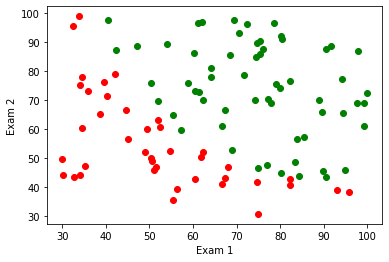

In [324]:
plt.scatter(x1,y1,color = 'green')
plt.scatter(x2,y2,color = 'red')
plt.ylabel('Exam 2'); plt.xlabel('Exam 1')

In [325]:
def minMaxN(scr):
  return (scr-scr.min())/(scr.max()-scr.min())
def myMinMax(test, scr):
  return (test - scr.min())/(scr.max()-scr.min())

In [326]:
score['exam_1'] = minMaxN(score['exam_1'])
score['exam_2'] = minMaxN(score['exam_2'])

In [327]:
sc = score[['exam_1', 'exam_2']].values
adm = score['admitted'].values

In [328]:
def s_fun(z):
  return (1/(1+ np.exp(-z)))
display(Math(r'S(z) = \frac{1}{1+e^{-z}} = \frac{e^z}{e^z+1}'))

<IPython.core.display.Math object>

In [329]:
def cost_f(y,h):
  return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()
display(Math(r'-\frac{1}{n}\sum_{i=1}^n\;[y^{(i)}log h_\theta(x^{(i)})+(1-y^{(i)})\;log(1-h_\theta(x^{(i)}))]'))

<IPython.core.display.Math object>

In [330]:
def init_pred(sc, w):
  return s_fun(np.dot(sc,w))

In [331]:
def next_pred(sc, w,th = 0.5):
  prp = init_pred(sc, w)
  prp[prp>=0.5] = 1
  prp[prp<0.5] = 0
  return prp

In [332]:
line = np.ones((sc.shape[0],1))
sc = np.concatenate((line,sc), axis = 1)
w = np.zeros(sc.shape[1])
lr = 0.1
its = 100000

In [333]:
cs = []
for i in range(its):
  z = np.dot(sc,w)
  h = s_fun(z)
  grd = np.dot(sc.T,(h-adm))/adm.size
  w -= lr*grd
  if i%1000 ==0:
     print(cost_f(adm,h))
  cs.append(cost_f(adm,h))

0.6931471805599453
0.3713254689168794
0.3036686574748253
0.2735199188771643
0.25631767121530763
0.2451649125948483
0.23735232829721598
0.23158889644988437
0.22717700431041687
0.2237048213667549
0.22091273177243753
0.2186285764965433
0.21673350743589076
0.2151427522395878
0.21379418361624863
0.21264121992922713
0.21164824931367116
0.21078758566869546
0.21003738779880624
0.20938020281776812
0.2088019250632925
0.20829103813324082
0.2078380538926322
0.2074350910894528
0.20707555459253318
0.20675388825813457
0.206465382419305
0.20620602240987487
0.20597236827166202
0.20576145841040291
0.2055707318245816
0.20539796486864428
0.20524121948588703
0.2050988005633422
0.20496922059444755
0.20485117023601654
0.2047434936497882
0.20464516775103803
0.2045552846656539
0.2044730368359778
0.20439770432430251
0.20432864394836764
0.20426527995088248
0.20420709595901443
0.20415362803298398
0.2041044586376978
0.20405921139952102
0.20401754653320825
0.20397915684273474
0.20394376421515056
0.2039111165392466


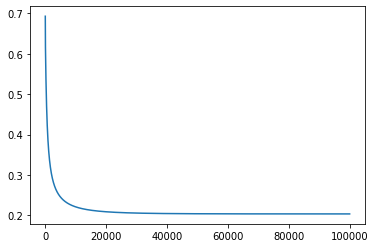

In [334]:
plt.plot(range(len(cs)), cs)

In [335]:
x1 = score[score['admitted']==1]['exam_1']
y1 = score[score['admitted']==1]['exam_2']
x2 = score[score['admitted']==0]['exam_1']
y2 = score[score['admitted']==0]['exam_2']
x3 = score['exam_1']

[0.0, 1.0]
[-12.65406006  14.23256197  13.599403  ]
[ 0.93048644 -0.11607141]


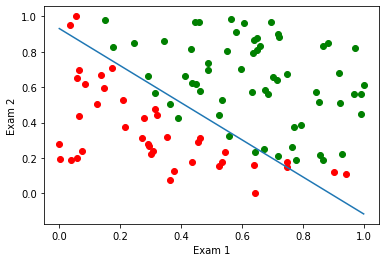

In [336]:
plt.scatter(x1,y1,color = 'green')
plt.scatter(x2,y2,color = 'red')
plt.ylabel('Exam 2'); plt.xlabel('Exam 1')

newX = [np.min(x3),np.max(x3)]
print(newX)
print(w)
newY = -(w[0] + np.dot(w[1],newX))/w[2]
print(newY)
plt.plot(newX,newY)
plt.show()

In [337]:
prps = init_pred(sc,w)
print(prps)
print(next_pred(sc, w, th=0.5))

[9.31333824e-02 4.72643833e-05 4.53565595e-02 9.89931091e-01
 9.98071986e-01 1.13536786e-02 9.98897660e-01 4.24666250e-01
 9.99683078e-01 7.33766085e-01 9.07860501e-01 2.97859324e-02
 9.99210957e-01 9.99839057e-01 1.58504251e-01 9.80131081e-01
 4.28996852e-01 1.51525020e-01 9.99679187e-01 5.74088554e-01
 6.88204552e-02 9.98527315e-01 7.83770407e-03 1.12067769e-04
 9.91454750e-01 8.52744031e-01 5.99880546e-01 8.63185364e-01
 9.46811320e-02 1.75942416e-02 8.94995475e-01 9.80258537e-01
 1.57505258e-01 3.93267413e-01 7.60778486e-02 3.43722763e-02
 8.49679230e-01 9.86967364e-01 2.06872990e-01 5.11289766e-02
 9.69245081e-01 6.47934891e-03 9.99416365e-01 5.03006489e-01
 4.77046880e-03 1.39655178e-01 9.92613313e-01 9.99995625e-01
 9.99139929e-01 9.99989517e-01 9.97974832e-01 9.99458379e-01
 9.03136903e-01 2.99456525e-03 8.99015944e-03 5.45594391e-02
 9.99842327e-01 6.91572683e-01 9.84839768e-01 9.95470273e-01
 9.99490859e-01 2.44216147e-04 3.73752439e-03 1.40369446e-04
 7.35970561e-02 4.235829

In [338]:
nextV = next_pred(sc , w)
print('Predicted value: \n',nextV)
print('\nReal value: \n',adm)
print('\nAccuracy:',accuracy_score(adm, nextV))

Predicted value: 
 [0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1.]

Real value: 
 [0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]

Accuracy: 0.89


In [339]:
newE1 = np.array([55,70])
newA1 = 1

newE2 = np.array([40,60])
newA2 = 0

newE1 = np.insert(myMinMax(newE1,initData['exam_1']),0,1.0)
newE2 = np.insert(myMinMax(newE2,initData['exam_1']),0,1.0)

print(init_pred(newE1,w))
print(init_pred(newE2,w))


0.5545748593925945
0.008244244228170695


In [340]:
lastData = (initData[['exam_1','exam_2']].values)

In [341]:
lg = LogisticRegression(C=100,random_state=10)
lg.fit(lastData,adm)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [342]:
print('Regression coefficient:', lg.coef_)
print('Accuracy:',lg.score(lastData,adm))

Regression coefficient: [[0.20622336 0.20146294]]
Accuracy: 0.89
